In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math_score'],axis=1)

In [5]:
X.shape

(1000, 7)

In [6]:
y=df['math_score']

In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [8]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer= StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer,cat_features),
        ('StandardScaler', numeric_transformer,num_features),
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [16]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [20]:
models = {
    'Linear Regression' : LinearRegression(),
    'K-Neighbors Regression' : KNeighborsRegressor(),
    'Decision Trees Regression' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'AdaBoost Regressor' : AdaBoostRegressor(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'XGB Regressor' : XGBRegressor(),
    'CatBoosting Regressor' : CatBoostRegressor(verbose=False),
}
model_list=[]
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mod_train_mae,mod_train_rmse,mod_train_r2 = evaluate_model(y_train,y_train_pred)
    mod_test_mae,mod_test_rmse,mod_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
    print('- Root Mean Squared Error: {:.4f}'.format(mod_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(mod_train_mae))
    print('- R2 Score: {:.4f}'.format(mod_train_r2))
    print('-'*35)
    print('Model performance for Test set')
    print('- Root Mean Squared Error: {:.4f}'.format(mod_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(mod_test_mae))
    print('- R2 Score: {:.4f}'.format(mod_test_r2))
    r2_list.append(mod_test_r2)
    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
- Root Mean Squared Error: 5.3261
- Mean Absolute Error: 4.2711
- R2 Score: 0.8742
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3893
- Mean Absolute Error: 4.2061
- R2 Score: 0.8806


K-Neighbors Regression
Model performance for training set
- Root Mean Squared Error: 5.7029
- Mean Absolute Error: 4.5110
- R2 Score: 0.8557
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2634
- Mean Absolute Error: 5.6590
- R2 Score: 0.7832


Decision Trees Regression
Model performance for training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.8581
- Mean Absolute Error: 6.2500
- R2 Score: 0.7462


Random Forest Regressor
Model performance for training set
- Root Mean Squared Error: 2.2737
- Mean Absolute Error: 1.8057


In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
0,Linear Regression,0.880642
6,Ridge,0.880593
3,Random Forest Regressor,0.852214
8,CatBoosting Regressor,0.851632
4,AdaBoost Regressor,0.849568
5,Lasso,0.825320
7,XGB Regressor,0.821589
1,K-Neighbors Regression,0.783193
2,Decision Trees Regression,0.746238


Linear Regressor has the highest R2 Score

### Linear regression

In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 88.06


Text(0, 0.5, 'Predicted')

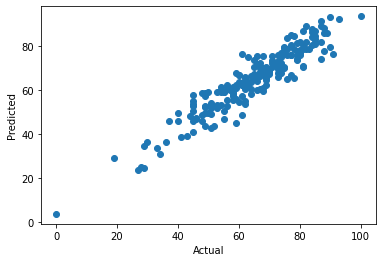

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')